In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Day 1

In [91]:
df = pd.read_csv('./data/dirty_data.csv')
df.head(10)
df.tail(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9990,9991,L57170,L,298.8,308.5,1527,36.2,3,0,0,0,0,0,0
9991,9992,M24851,M,298.9,308.4,1827,26.1,5,0,0,0,0,0,0
9992,9993,L57172,L,298.8,308.4,1484,39.2,8,0,0,0,0,0,0
9993,9994,L57173,L,298.8,308.4,1401,47.3,10,0,0,0,0,0,0
9994,9995,L57174,L,298.8,308.3,1634,27.9,12,0,0,0,0,0,0
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


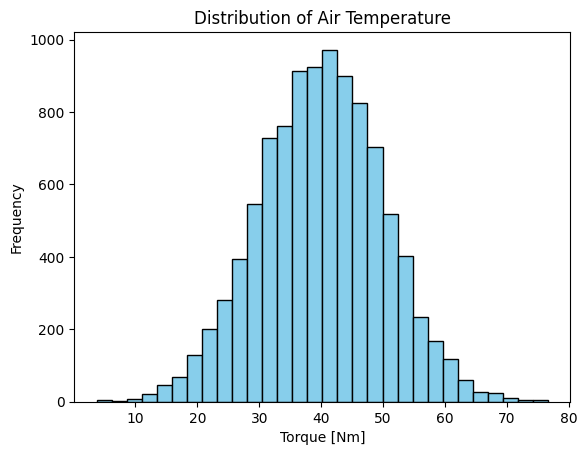

In [92]:
#histogram for air temperature
plt.hist(df['Torque [Nm]'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Air Temperature')
plt.xlabel('Torque [Nm]')
plt.ylabel('Frequency')
plt.show()

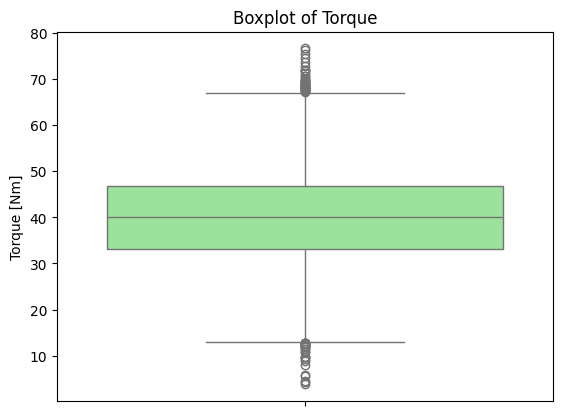

In [93]:
# box plot for air temperature
sns.boxplot(y=df['Torque [Nm]'], color='lightgreen')
plt.title('Boxplot of Torque')
plt.ylabel('Torque [Nm]')
plt.show()

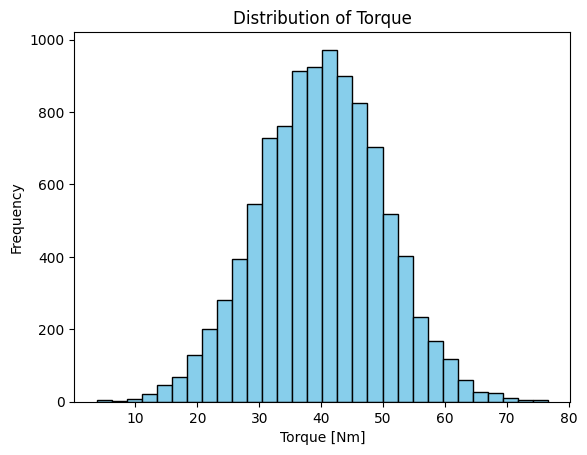

In [94]:
#histogram for Torque
plt.hist(df['Torque [Nm]'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Torque')
plt.xlabel('Torque [Nm]')
plt.ylabel('Frequency')
plt.show()

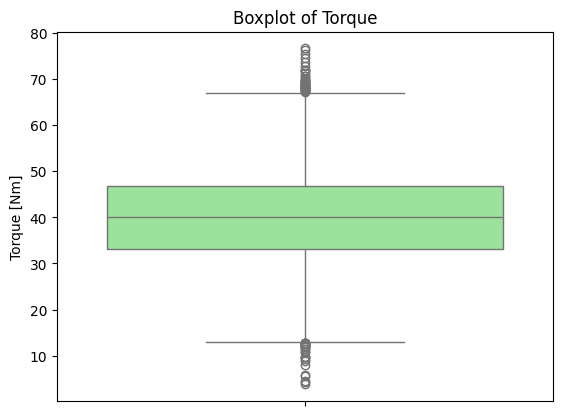

In [95]:
# box plot for torque
sns.boxplot(y=df['Torque [Nm]'], color='lightgreen')
plt.title('Boxplot of Torque')
plt.ylabel('Torque [Nm]')
plt.show()

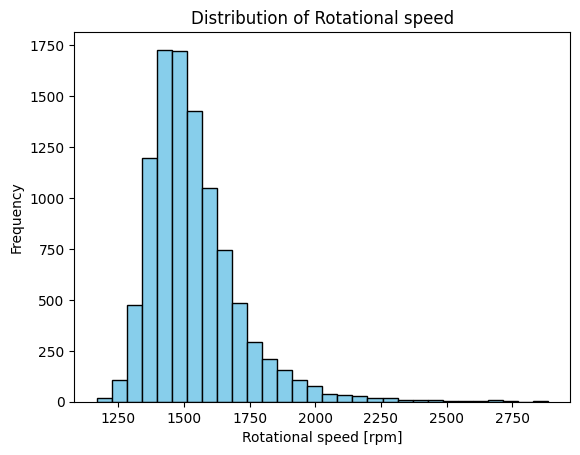

In [96]:
#histogram for Rotational speed [rpm]
plt.hist(df['Rotational speed [rpm]'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Rotational speed')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Frequency')
plt.show()

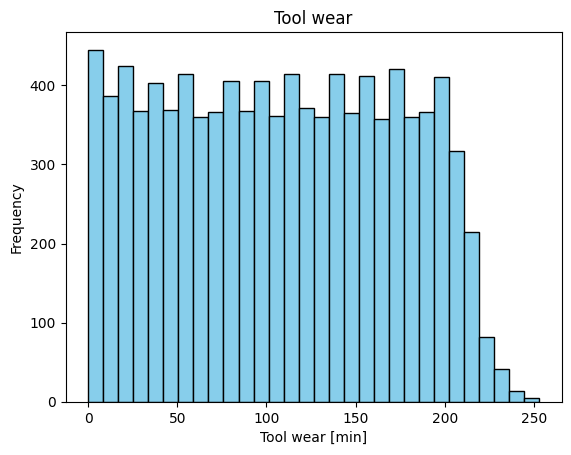

In [97]:
#histogram for Tool wear [min]
plt.hist(df['Tool wear [min]'], bins=30, color='skyblue', edgecolor='black')
plt.title('Tool wear')
plt.xlabel('Tool wear [min]')
plt.ylabel('Frequency')
plt.show()

# Day 2

In [98]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [99]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [100]:
# a temporary variable to hold the cleaned data
features_df = df[['Type', 'Air temperature [K]', 
                  'Process temperature [K]', 
                  'Rotational speed [rpm]', 
                  'Torque [Nm]', 
                  'Tool wear [min]' 
                  ]].copy()

features_df['Rotational speed [rad/s]'] = features_df['Rotational speed [rpm]'] * (2 * np.pi / 60)

features_df.drop(columns=['Rotational speed [rpm]'], inplace=True)

features_df['Power [W]'] = features_df['Torque [Nm]'] * features_df['Rotational speed [rad/s]']

features_df


,Type,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Rotational speed [rad/s],Power [W]
0,M,298.1,308.6,42.8,0,162.420340,6951.590560
1,L,298.2,308.7,46.3,3,147.445415,6826.722724
2,L,298.1,308.5,49.4,5,156.870193,7749.387543
3,L,298.2,308.6,39.5,7,150.063409,5927.504659
4,L,298.2,308.7,40.0,9,147.445415,5897.816608
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,29.5,14,167.970487,4955.129373
9996,H,298.9,308.4,31.8,17,170.902640,5434.703963
9997,M,299.0,308.6,33.4,22,172.263997,5753.617506
9998,H,299.0,308.7,48.5,25,147.445415,7151.102638


In [101]:
le = LabelEncoder()
features_df['type_encoded'] = le.fit_transform(features_df['Type'])

features_df.drop(columns=['Type'], inplace=True)
features_df

,Air temperature [K],Process temperature [K],Torque [Nm],Tool wear [min],Rotational speed [rad/s],Power [W],type_encoded
0,298.1,308.6,42.8,0,162.420340,6951.590560,2
1,298.2,308.7,46.3,3,147.445415,6826.722724,1
2,298.1,308.5,49.4,5,156.870193,7749.387543,1
3,298.2,308.6,39.5,7,150.063409,5927.504659,1
4,298.2,308.7,40.0,9,147.445415,5897.816608,1
...,...,...,...,...,...,...,...
9995,298.8,308.4,29.5,14,167.970487,4955.129373,2
9996,298.9,308.4,31.8,17,170.902640,5434.703963,0
9997,299.0,308.6,33.4,22,172.263997,5753.617506,2
9998,299.0,308.7,48.5,25,147.445415,7151.102638,0


In [102]:
features_df.to_csv('./data/selected_features.csv', index=False)

In [103]:
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

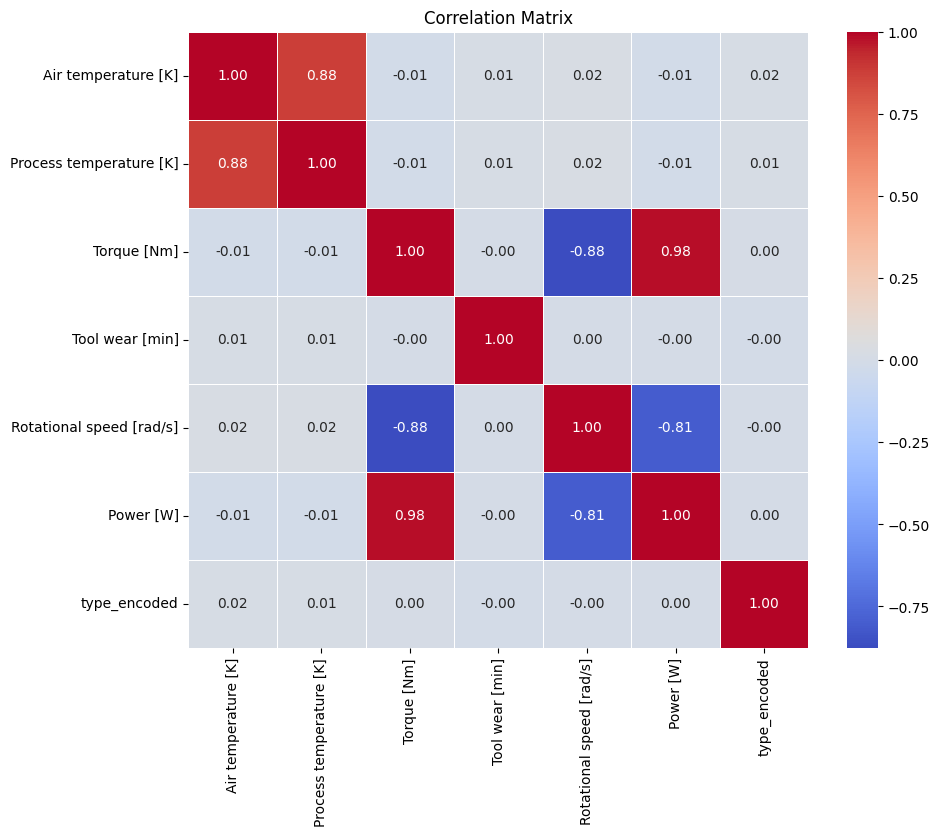

In [104]:
# Computing correlation matrix
corr_matrix = features_df.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()